In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import style
import pandas as pd

In [2]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10, 6)
style.use('seaborn')

In [3]:
def transform_graph(graph, opinion1):
    
    nodes = list(graph.nodes())
    n = len(nodes)
    opinion1_count = int(opinion1*n)
    opinions = [1]*opinion1_count + [-1]*(n - opinion1_count)
    rd.shuffle(opinions)
    neighbors = [0]*n
    
    for i in range(n):
        neighbors[i] = list(graph.neighbors(nodes[i]))
        
    return opinions, neighbors

In [4]:
def simulate_model(graph, opinion1, p, q, epsilon, MCS):
    
    new_graph = transform_graph(graph, opinion1)
    opinions, neighbors = new_graph
    node_num = len(opinions)
    magnetization = np.zeros(MCS)
    N = len(graph.nodes())
    
    for i in range(MCS):
        node = np.random.randint(0, node_num)
        opinion = opinions[node]
        node_neighbors = rd.choices(neighbors[node], k = q)
        node_opinions = [opinions[j] for j in node_neighbors]
        
        if opinion == 1 and np.random.uniform() < p and np.random.uniform() < 0.5:
            opinions[node] = -1
        elif opinion == 1 and (node_opinions.count(-1) == q or np.random.uniform() < epsilon):
            opinions[node] = -1
            
        elif opinion == -1 and np.random.uniform() < p and np.random.uniform() < 0.5:
            opinions[node] = 1
        elif opinion == -1 and (node_opinions.count(1) == q or np.random.uniform() < epsilon):
            opinions[node] = 1
            
        magnetization[i] = np.sum(opinions) / N
            
    return magnetization

In [5]:
def avg_mag_time(ps, N, q, epsilon):
    avg_mag1 = np.zeros((N, len(ps)))
    avg_mag2 = np.zeros((N, len(ps)))
    avg_mag3 = np.zeros((N, len(ps)))
    
    for p in range(len(ps)):
        mag1 = np.zeros((100, N))
        mag2 = np.zeros((100, N))
        mag3 = np.zeros((100, N))
        for i in range(100):
            g1 = nx.barabasi_albert_graph(100, 4)
            g2 = nx.watts_strogatz_graph(100, 4, 0.01)
            g3 = nx.watts_strogatz_graph(100, 4, 0.2)
            mag1[i] = simulate_model(g1, 0.5, ps[p], q, epsilon, N)
            mag2[i] = simulate_model(g2, 0.5, ps[p], q, epsilon, N)
            mag3[i] = simulate_model(g3, 0.5, ps[p], q, epsilon, N)

        avg_mag1[:,p] = np.mean(mag1, axis=0)
        avg_mag2[:,p] = np.mean(mag2, axis=0)
        avg_mag3[:,p] = np.mean(mag3, axis=0)
        
    colnames = [f'p = {str(round(p, 2))}' for p in ps]
        
    df1 = pd.DataFrame(avg_mag1, columns=colnames)
    df2 = pd.DataFrame(avg_mag2, columns=colnames)
    df3 = pd.DataFrame(avg_mag3, columns=colnames)
        
    return df1, df2, df3

In [6]:
def avg_mag_p_WS(p, q, epsilon, MCS, ws_edges, ws_prob):
    avg_mag = np.zeros(100)

    for i in range(100):
        graph = nx.watts_strogatz_graph(100, ws_edges, ws_prob)
        mag = simulate_model(graph, 0.5, p, q, epsilon, MCS)[-1]
        avg_mag[i] = abs(mag)
    
    return np.mean(avg_mag)

In [7]:
def avg_mag_p_BA(p, q, epsilon, MCS):
    avg_mag = np.zeros(100)

    for i in range(100):
        graph = nx.barabasi_albert_graph(100, 4)
        mag = simulate_model(graph, 0.5, p, q, epsilon, MCS)[-1]
        avg_mag[i] = abs(mag)
    
    return np.mean(avg_mag)

### Average magnetization as function of time &mdash; $o_1 = 0.5$, $q = 3$, $\epsilon = 0.15$

$o_1$ &mdash; initial proportion of opinion 1

In [8]:
ps = np.arange(0, 0.52, 0.02)
N = 100000

In [9]:
df1, df2, df3 = avg_mag_time(ps, N, 3, 0.15)

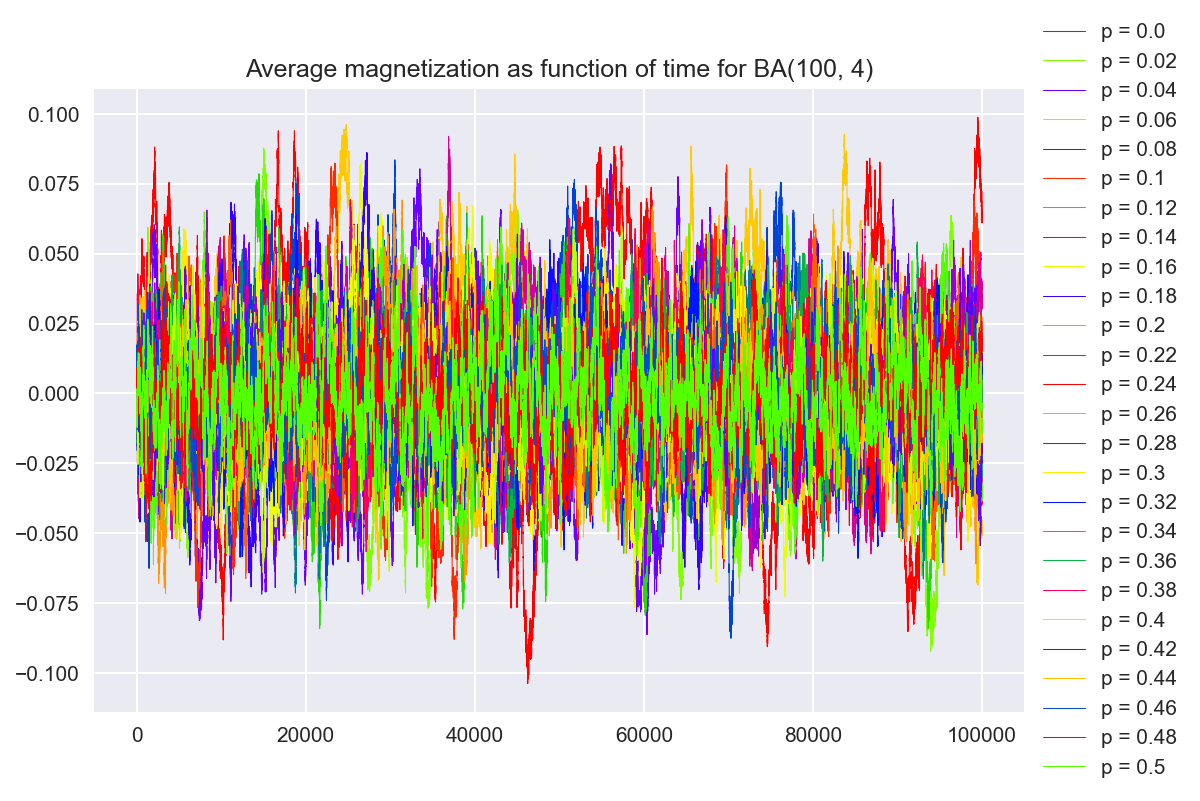

In [10]:
df1.plot(title = 'Average magnetization as function of time for BA(100, 4)', linewidth=0.5, colormap='prism')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('plots/1.png')
plt.show()

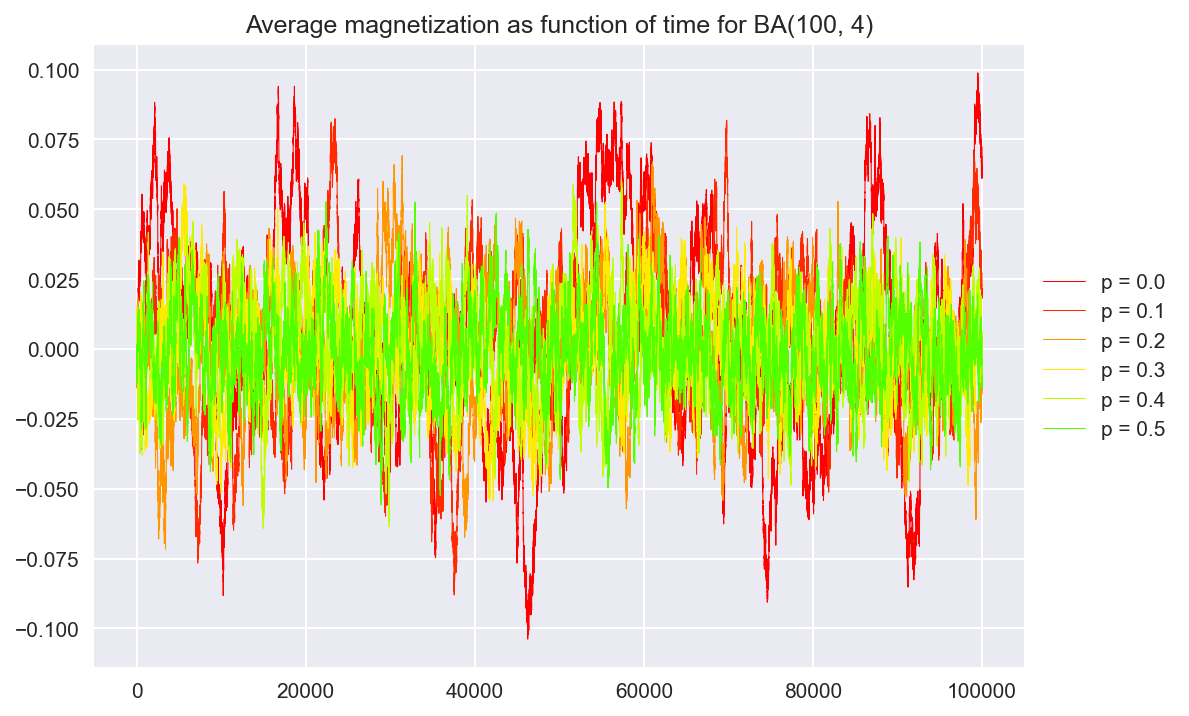

In [24]:
df1.iloc[:, np.arange(0, 26, 5)].plot(title = 'Average magnetization as function of time for BA(100, 4)', linewidth=0.5, colormap='prism')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('plots/1a.png')
plt.show()

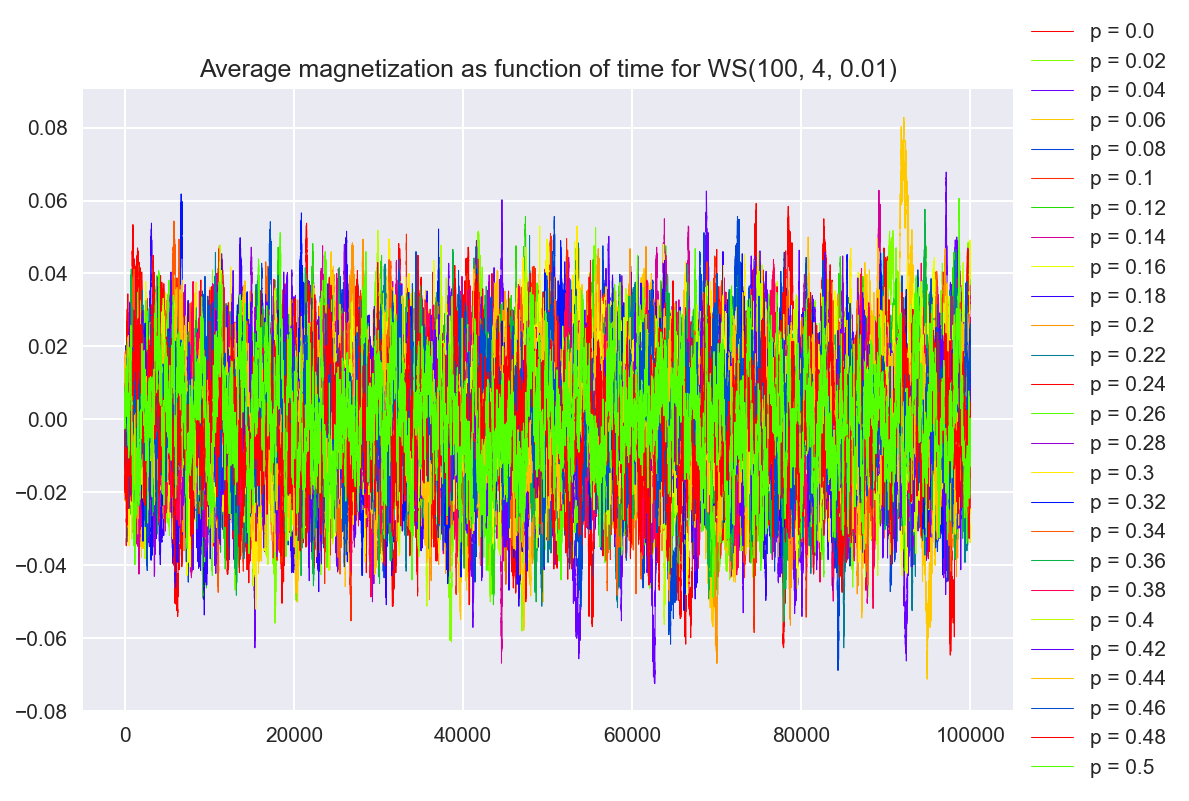

In [11]:
df2.plot(title = 'Average magnetization as function of time for WS(100, 4, 0.01)', linewidth=0.5, colormap='prism')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('plots/2.png')
plt.show()

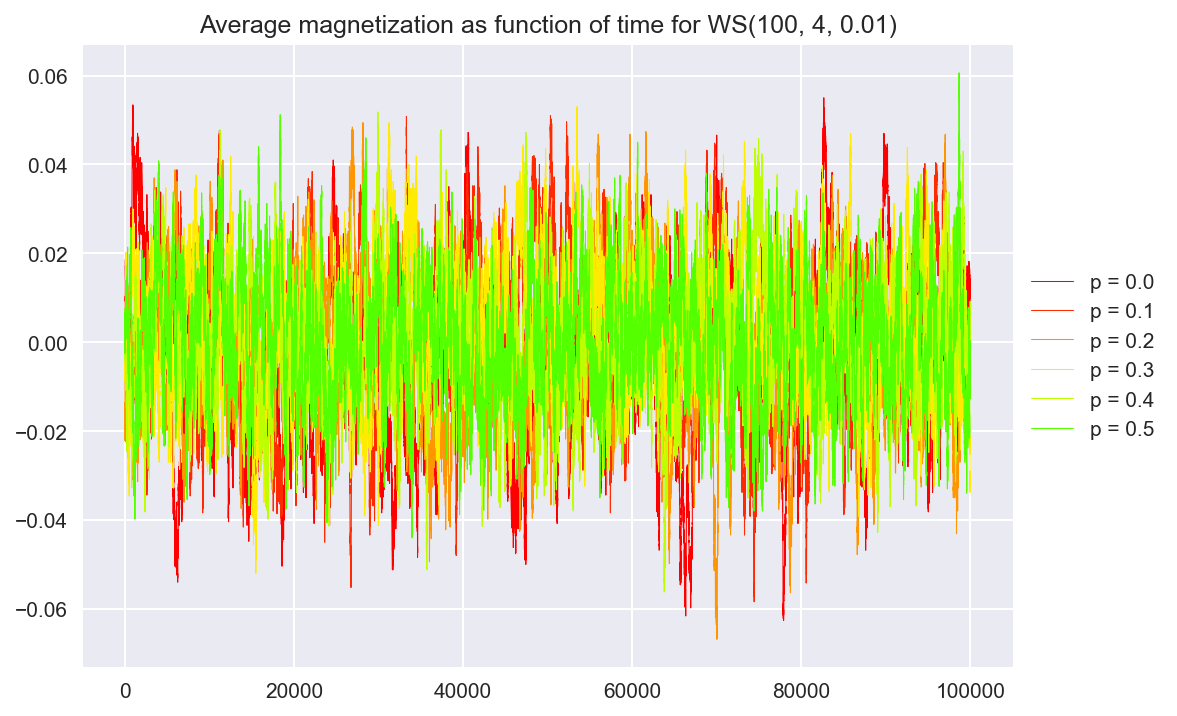

In [25]:
df2.iloc[:, np.arange(0, 26, 5)].plot(title = 'Average magnetization as function of time for WS(100, 4, 0.01)', linewidth=0.5, colormap='prism')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('plots/2a.png')
plt.show()

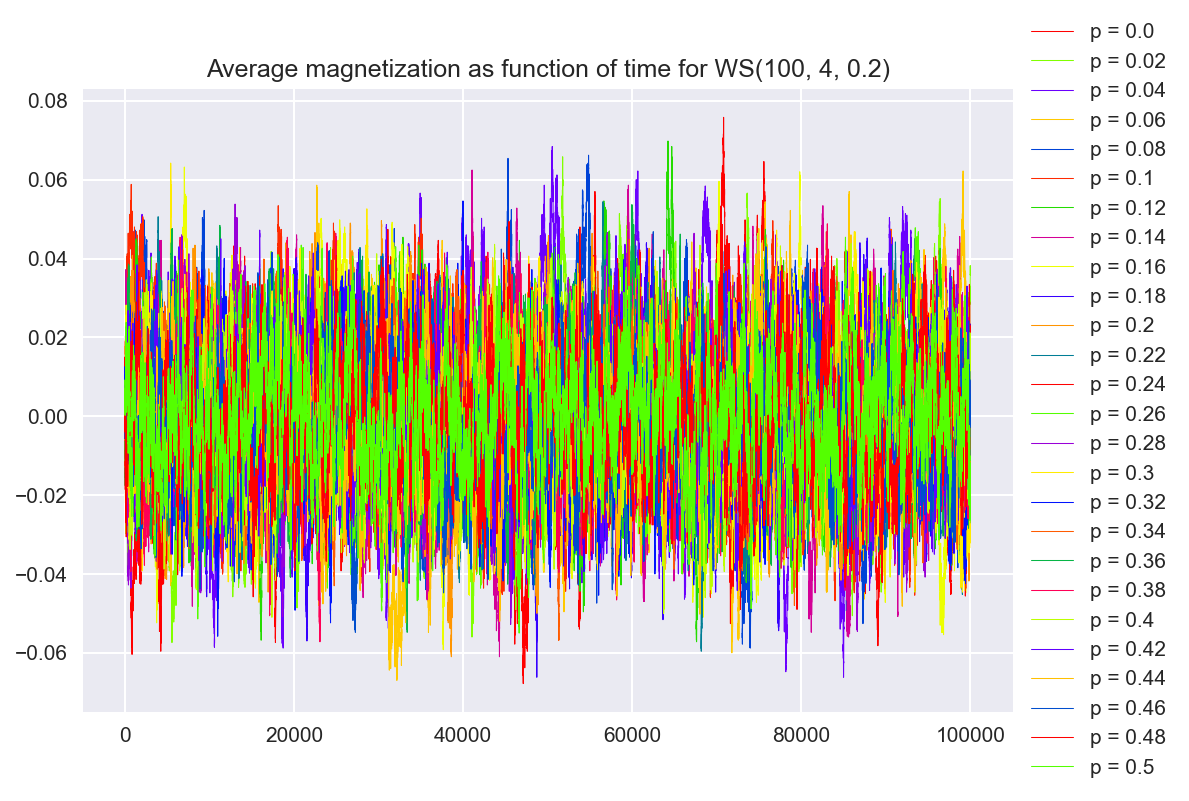

In [12]:
df3.plot(title = 'Average magnetization as function of time for WS(100, 4, 0.2)', linewidth=0.5, colormap='prism')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('plots/3.png')
plt.show()

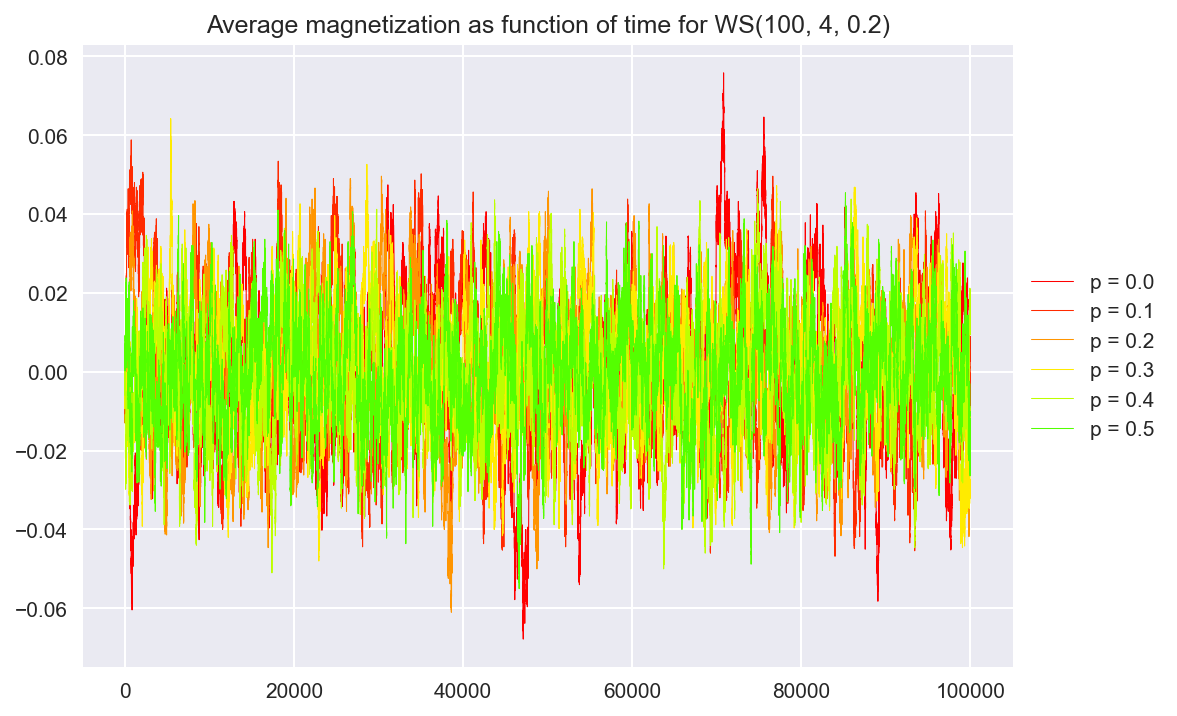

In [26]:
df3.iloc[:, np.arange(0, 26, 5)].plot(title = 'Average magnetization as function of time for WS(100, 4, 0.2)', linewidth=0.5, colormap='prism')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('plots/3a.png')
plt.show()

### Average magnetization as function of time &mdash; $o_1 = 0.5$, $q = 4$, $\epsilon = 0.15$

In [27]:
df1, df2, df3 = avg_mag_time(ps, N, 4, 0.01)

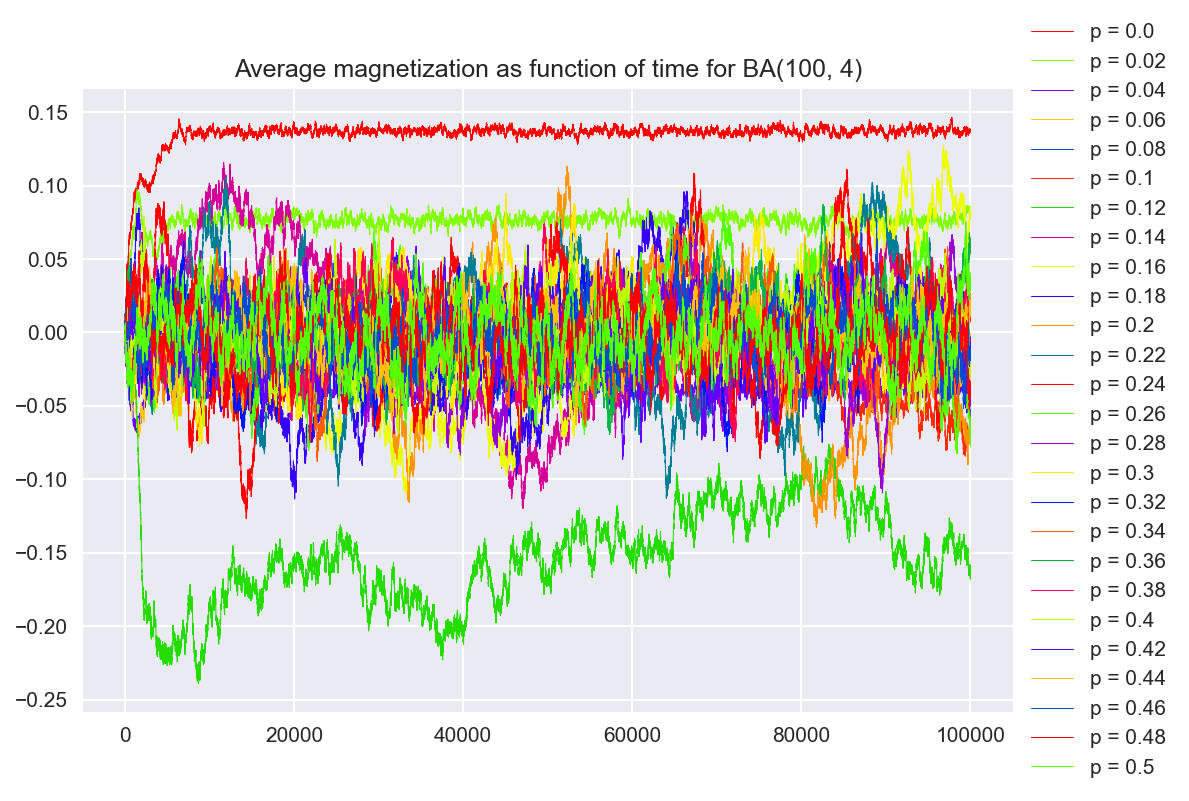

In [28]:
df1.plot(title = 'Average magnetization as function of time for BA(100, 4)', linewidth=0.5, colormap='prism')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('plots/4.png')
plt.show()

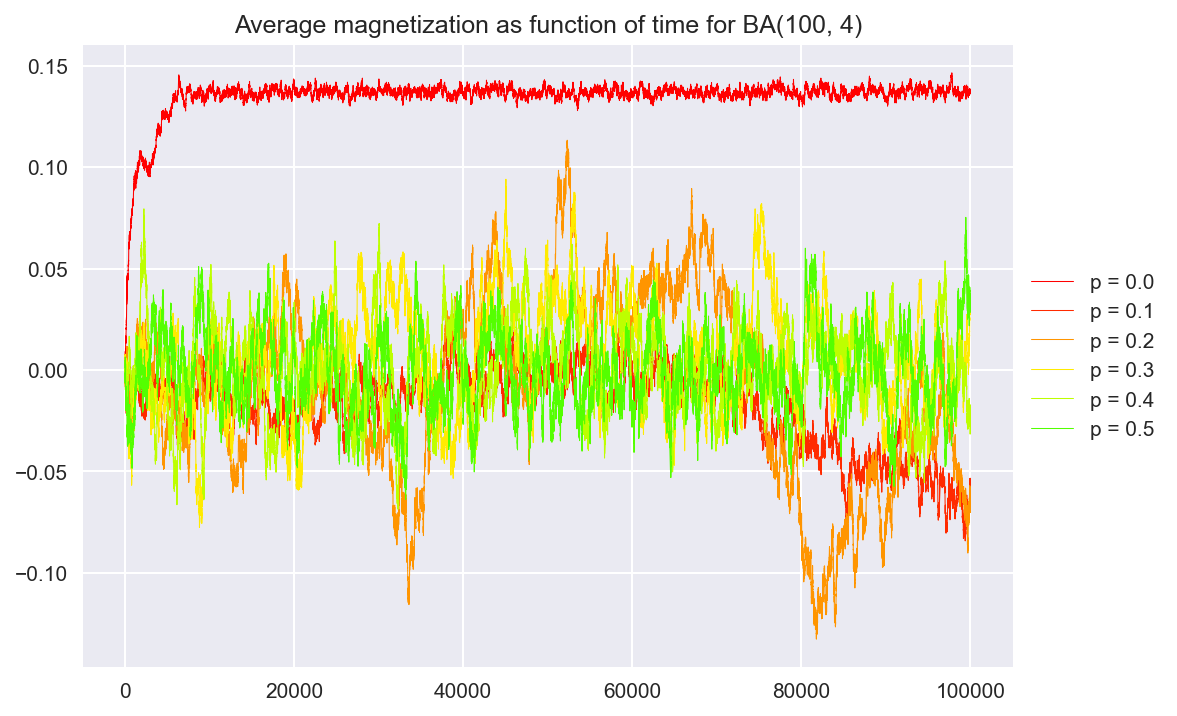

In [29]:
df1.iloc[:, np.arange(0, 26, 5)].plot(title = 'Average magnetization as function of time for BA(100, 4)', linewidth=0.5, colormap='prism')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('plots/4a.png')
plt.show()

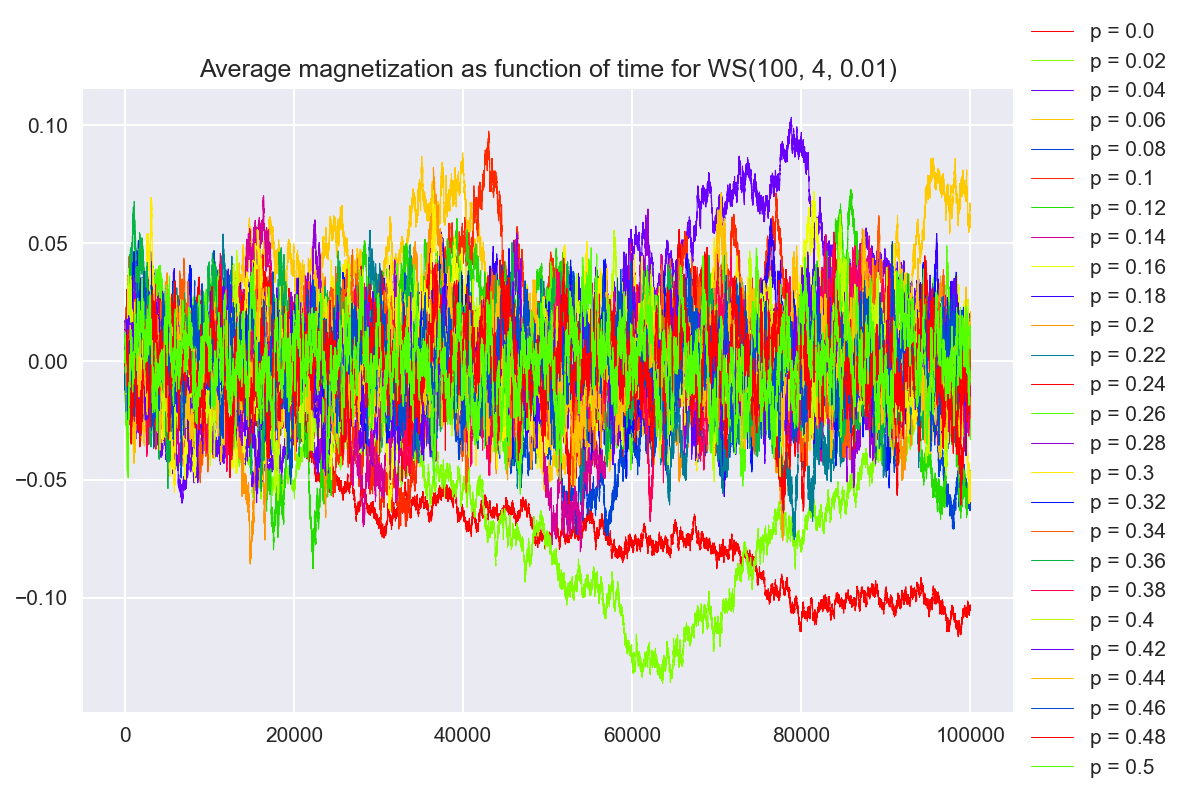

In [30]:
df2.plot(title = 'Average magnetization as function of time for WS(100, 4, 0.01)', linewidth=0.5, colormap='prism')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('plots/5.png')
plt.show()

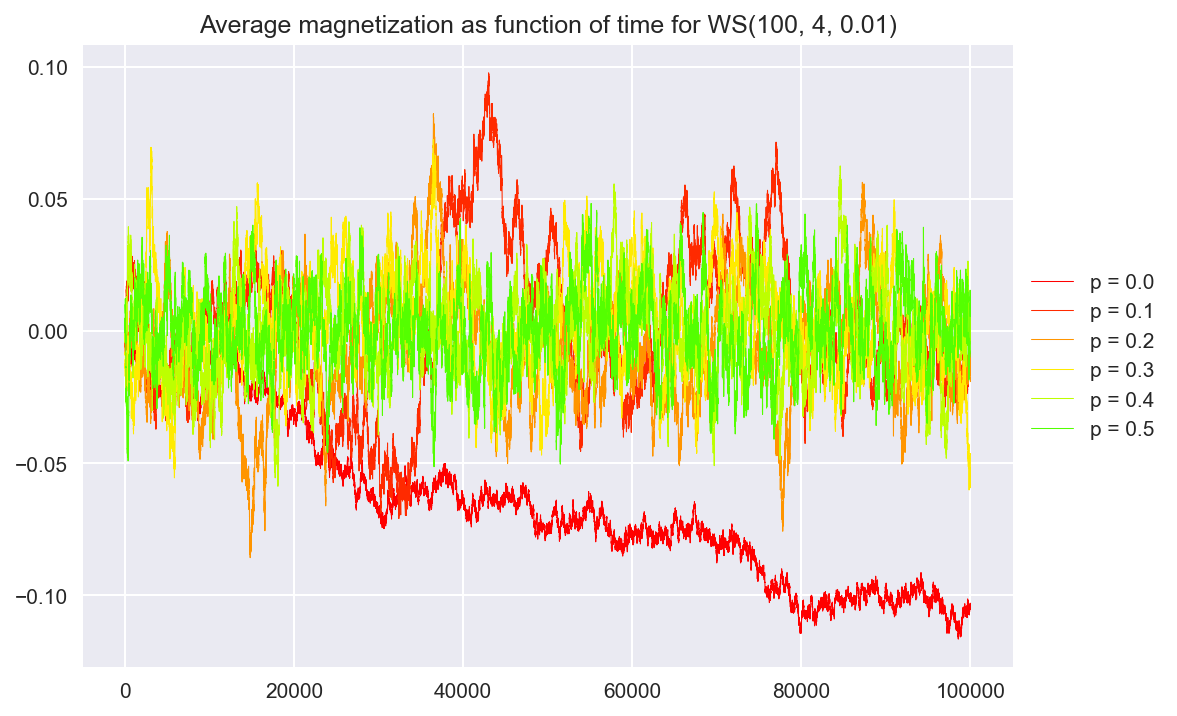

In [31]:
df2.iloc[:, np.arange(0, 26, 5)].plot(title = 'Average magnetization as function of time for WS(100, 4, 0.01)', linewidth=0.5, colormap='prism')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('plots/5a.png')
plt.show()

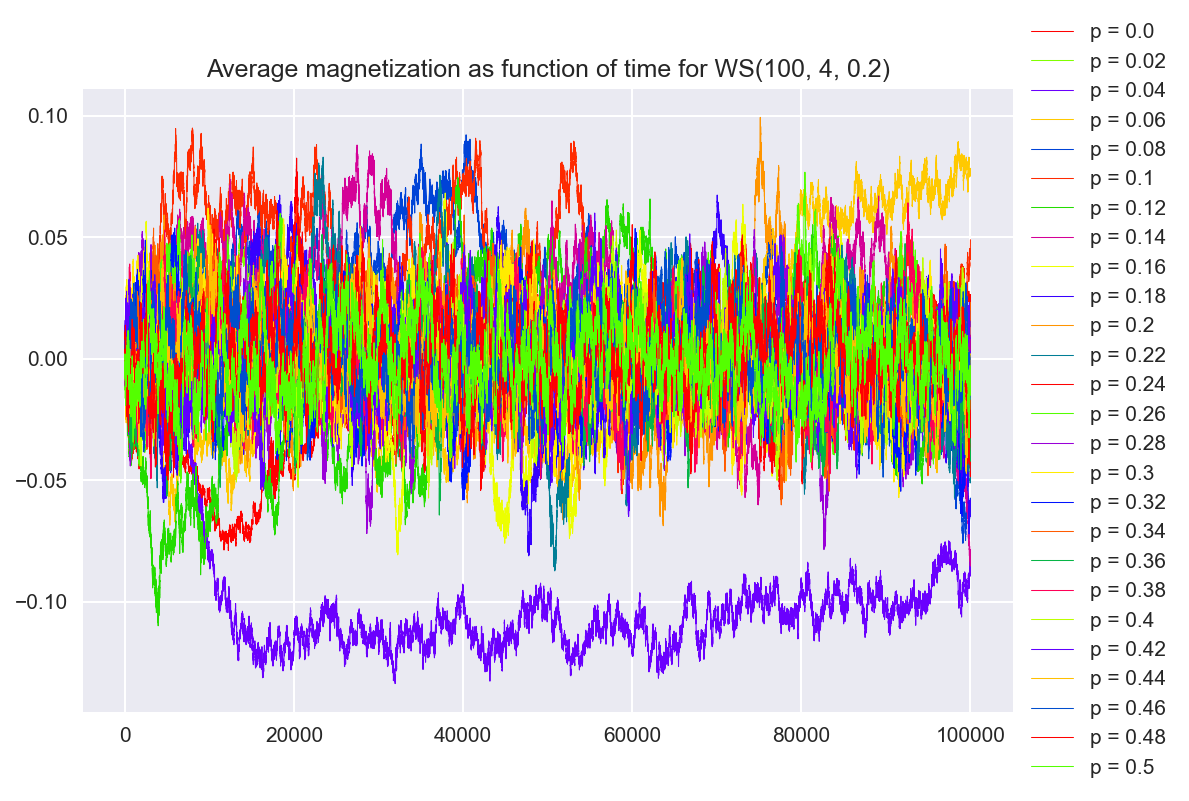

In [32]:
df3.plot(title = 'Average magnetization as function of time for WS(100, 4, 0.2)', linewidth=0.5, colormap='prism')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('plots/6.png')
plt.show()

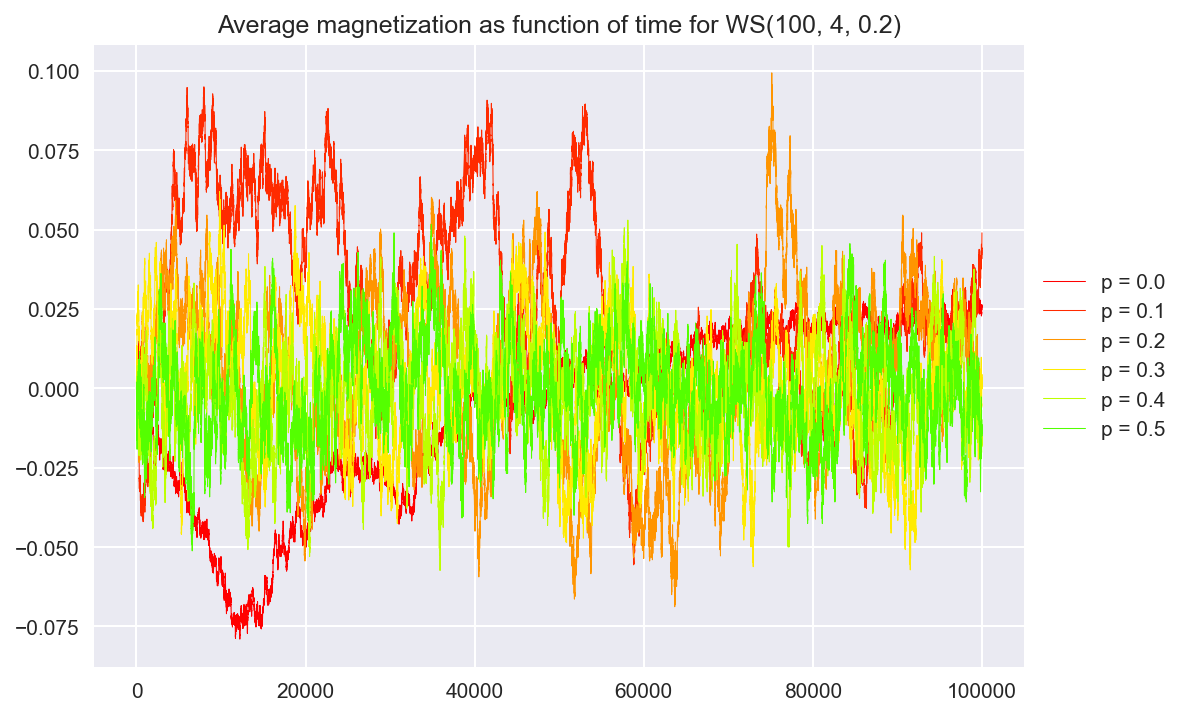

In [33]:
df3.iloc[:, np.arange(0, 26, 5)].plot(title = 'Average magnetization as function of time for WS(100, 4, 0.2)', linewidth=0.5, colormap='prism')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('plots/6a.png')
plt.show()

### Magnetization as function of time for WS(100, 4, 0.01), $o_1 = 0.5$, $q = 3$, $\epsilon = 0.15$

In [34]:
ps = np.arange(0, 0.52, 0.02)
N = 100000

In [35]:
mag = np.zeros((N, len(ps)))
for p in range(len(ps)):
    g = nx.watts_strogatz_graph(100, 4, 0.01)
    mag[:,p] = simulate_model(g, 0.5, ps[p], 3, 0.15, N)
    
colnames = [f'p = {str(round(p, 2))}' for p in ps]    
df = pd.DataFrame(mag, columns=colnames)

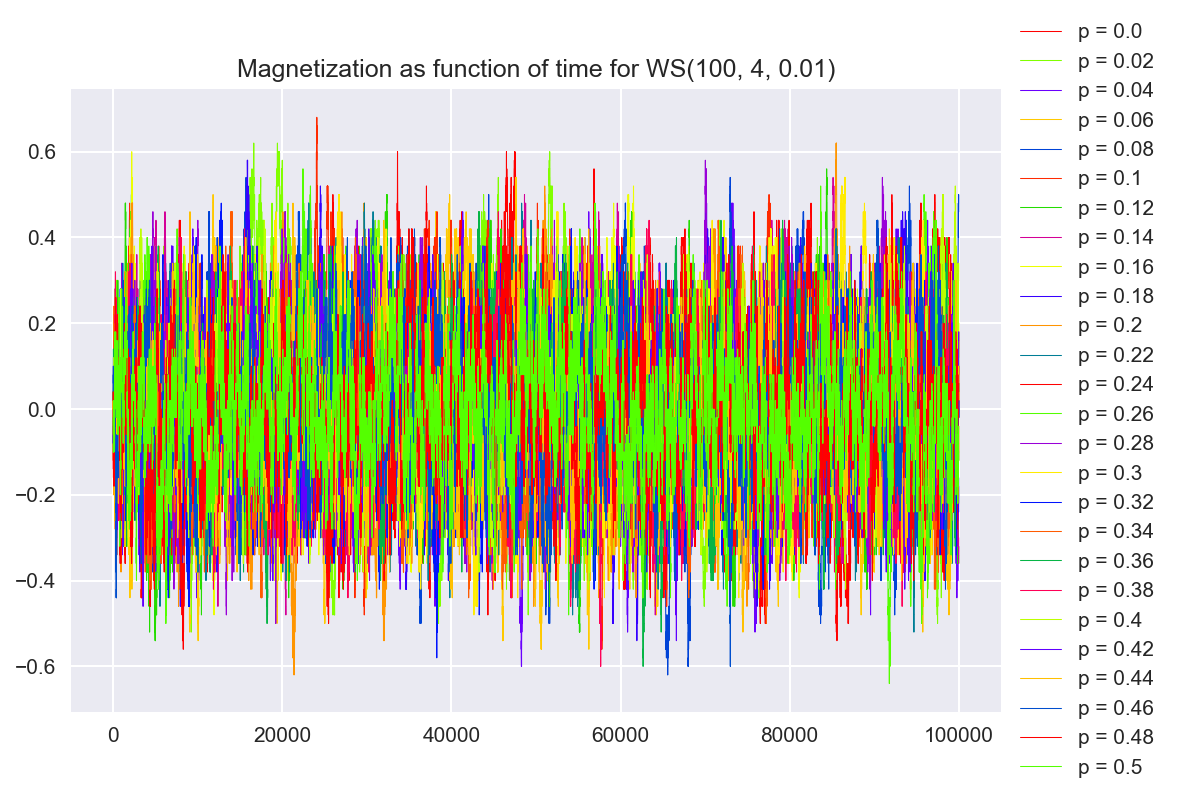

In [36]:
df.plot(title = 'Magnetization as function of time for WS(100, 4, 0.01)', linewidth=0.5, colormap='prism')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('plots/7.png')
plt.show()

### Magnetization as function of time for WS(100, 4, 0.01), $o_1 = 0.5$, $q = 4$, $\epsilon = 0.15$

In [37]:
mag = np.zeros((N, len(ps)))
for p in range(len(ps)):
    g = nx.watts_strogatz_graph(100, 4, 0.01)
    mag[:,p] = simulate_model(g, 0.5, ps[p], 4, 0.15, N)
    
colnames = [f'p = {str(round(p, 2))}' for p in ps]    
df = pd.DataFrame(mag, columns=colnames)

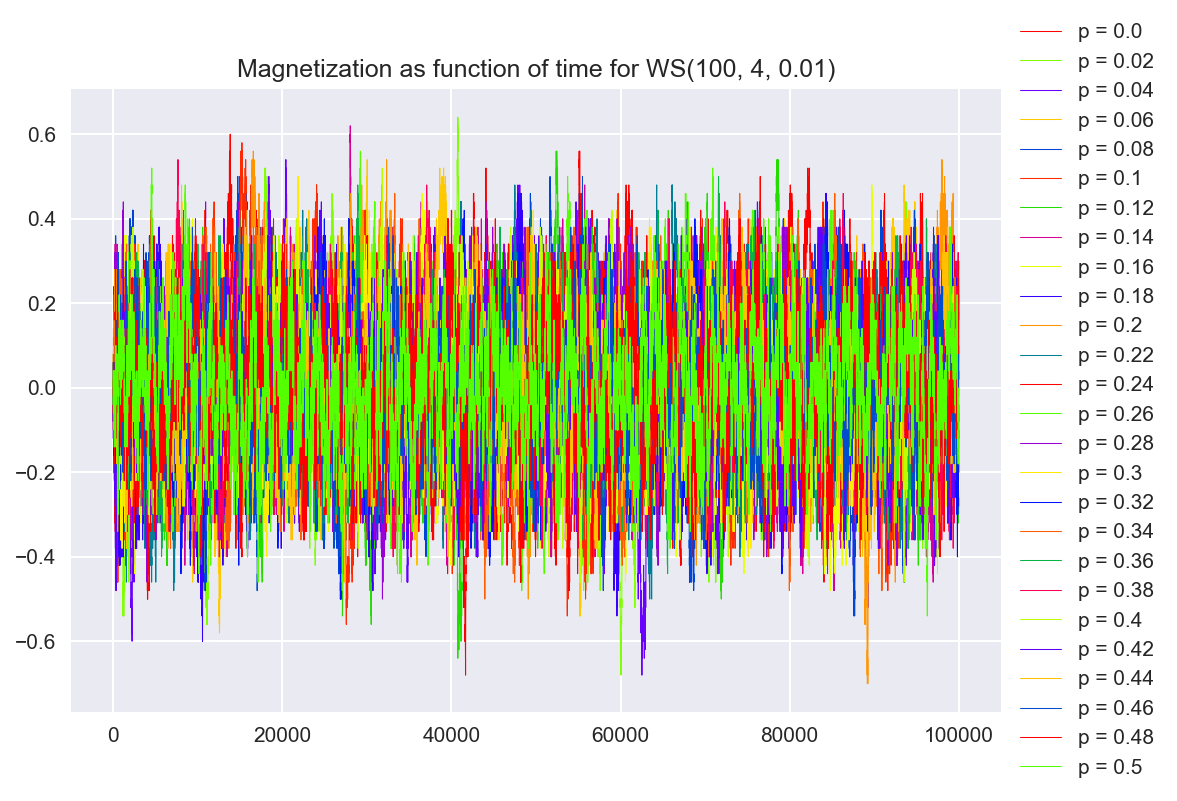

In [38]:
df.plot(title = 'Magnetization as function of time for WS(100, 4, 0.01)', linewidth=0.5, colormap='prism')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('plots/8.png')
plt.show()

### Average magnetization vs single run magnetization for WS(100, 4, 0.01), $o_1 = 0.5$, $q = 4$, $\epsilon = 0.15$, $p=0.25$

Although we can see from above plots (Y-axis scale) that the fluctuations are much smaller in case of averaged magnetization, I will plot an average magnetization vs single run magnetization for one fixed value of $p$ on one plot just to see the difference more clearly.

In [46]:
p = 0.25
N = 100000

In [47]:
g = nx.watts_strogatz_graph(100, 4, 0.01)
mag_sing = simulate_model(g, 0.5, 0.25, 4, 0.15, N)

In [49]:
mags = np.zeros((100, N))
for i in range(100):
    g = nx.watts_strogatz_graph(100, 4, 0.01)
    mags[i] = simulate_model(g, 0.5, 0.25, 4, 0.15, N)
    
mag_avg = np.mean(mags, axis=0)

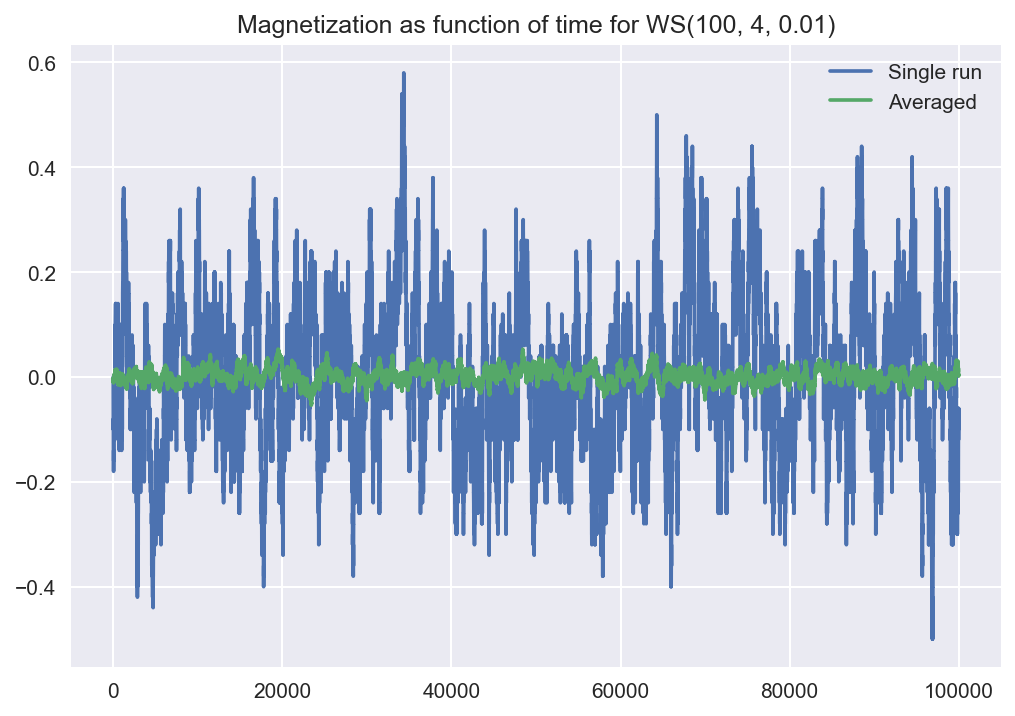

In [51]:
plt.plot(mag_sing, label='Single run')
plt.plot(mag_avg, label='Averaged')
plt.title('Magnetization as function of time for WS(100, 4, 0.01)')
plt.legend()
plt.savefig('plots/5_8.png')
plt.show()

### Average final magnetization as function of p &mdash; $o_1 = 0.5$, $q = 3$, $\epsilon = 0.15$, different networks

In [39]:
ps = np.arange(0, 0.52, 0.02)
N = 100000

In [40]:
avg_mags1 = np.zeros(len(ps))
avg_mags2 = np.zeros(len(ps))
for p in range(len(ps)):
    avg_mags1[p] = avg_mag_p_WS(ps[p], 3, 0.1, N, 4, 0.2)
    avg_mags2[p] = avg_mag_p_BA(ps[p], 3, 0.1, N)

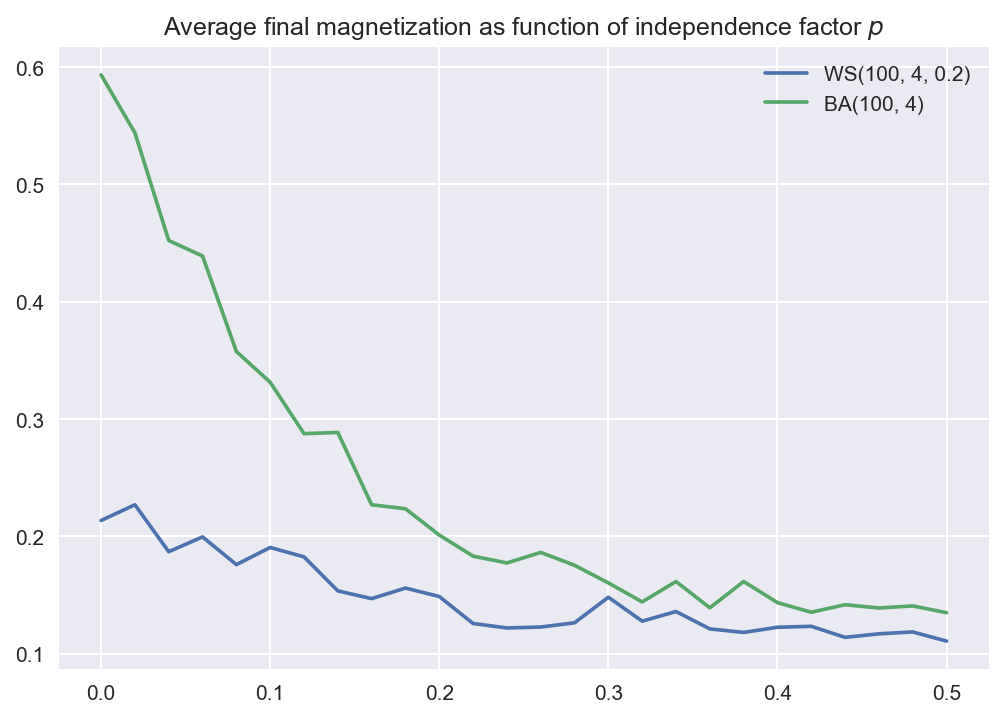

In [41]:
plt.plot(ps, avg_mags1, label='WS(100, 4, 0.2)')
plt.plot(ps, avg_mags2, label='BA(100, 4)')
plt.legend()
plt.title(r'Average final magnetization as function of independence factor $p$')
plt.savefig('plots/9.png')
plt.show()

### Average final magnetization as function of p &mdash; $o_1 = 0.5$, $q = 4$, $\epsilon = 0.15$, different networks

In [42]:
avg_mags1 = np.zeros(len(ps))
avg_mags2 = np.zeros(len(ps))
for p in range(len(ps)):
    avg_mags1[p] = avg_mag_p_WS(ps[p], 4, 0.1, N, 4, 0.2)
    avg_mags2[p] = avg_mag_p_BA(ps[p], 4, 0.1, N)

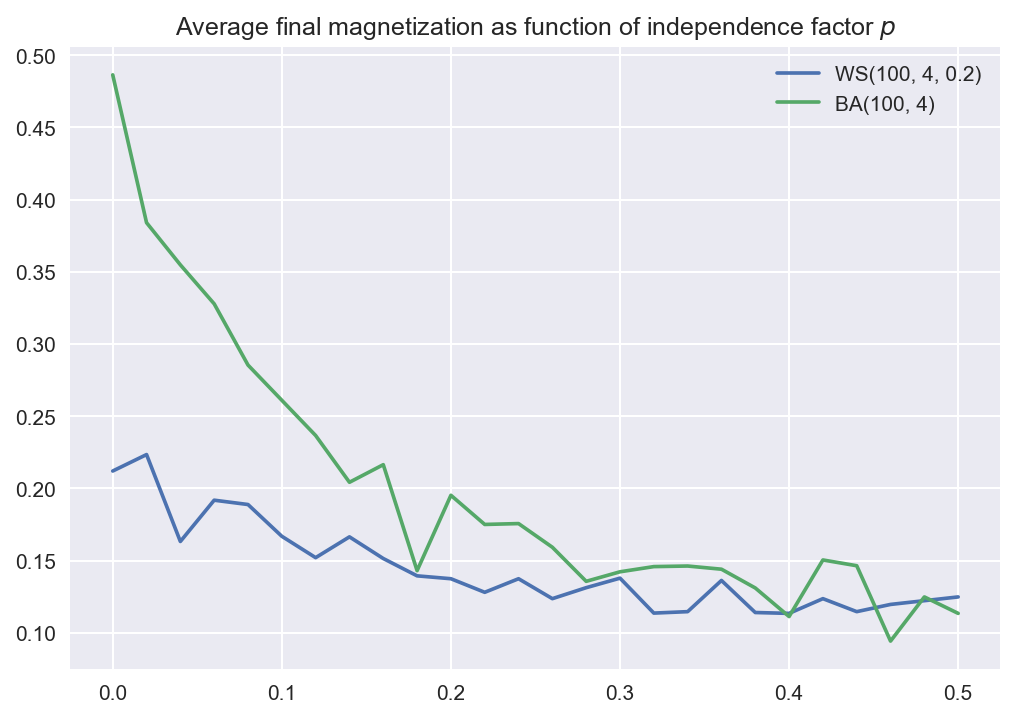

In [43]:
plt.plot(ps, avg_mags1, label='WS(100, 4, 0.2)')
plt.plot(ps, avg_mags2, label='BA(100, 4)')
plt.legend()
plt.title(r'Average final magnetization as function of independence factor $p$')
plt.savefig('plots/10.png')
plt.show()

### Average final magnetization as function of p &mdash; $o_1 = 0.5$, $q \in \{3, 4\}$, $\epsilon = 0.15$, WS(100, 4, 0.01)

In [44]:
avg_mags1 = np.zeros(len(ps))
avg_mags2 = np.zeros(len(ps))
for p in range(len(ps)):
    avg_mags1[p] = avg_mag_p_WS(ps[p], 3, 0.1, N, 4, 0.01)
    avg_mags2[p] = avg_mag_p_WS(ps[p], 4, 0.1, N, 4, 0.01)

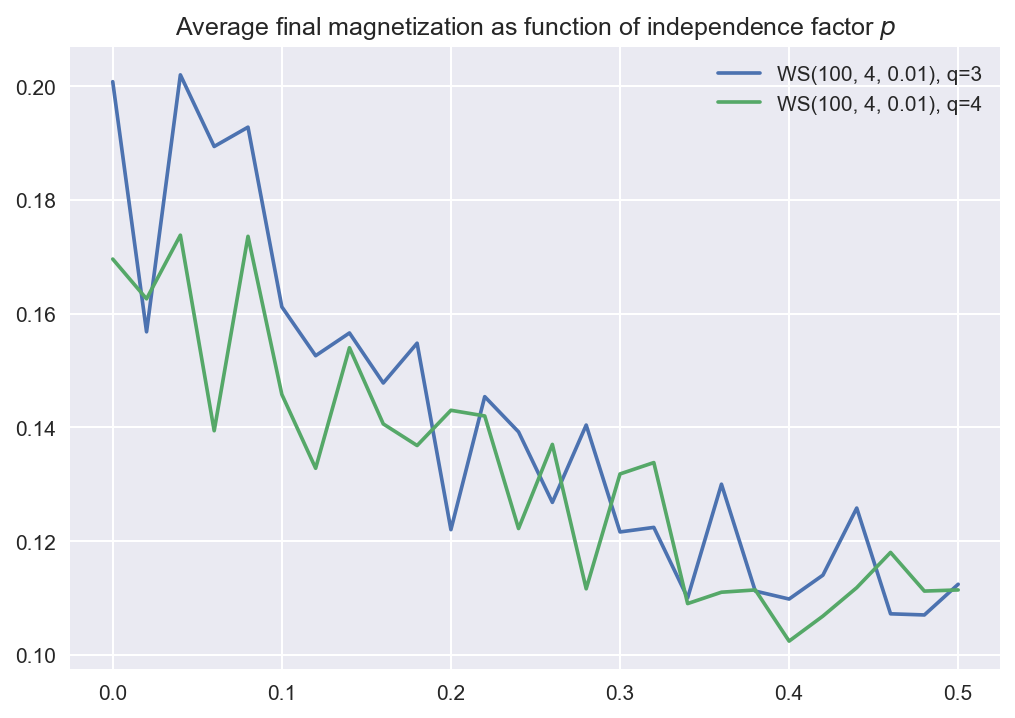

In [45]:
plt.plot(ps, avg_mags1, label='WS(100, 4, 0.01), q=3')
plt.plot(ps, avg_mags2, label='WS(100, 4, 0.01), q=4')
plt.legend()
plt.title(r'Average final magnetization as function of independence factor $p$')
plt.savefig('plots/11.png')
plt.show()